<a href="https://colab.research.google.com/github/Prakas-Dutta/Hand-gesture-to-alphabet/blob/main/Alphabetical_Hand_gesture_recognition_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
data_path = "/content/drive/MyDrive/"
os.chdir(data_path)
os.listdir(data_path)

['SignAlphaSet (1)',
 'SignAlphaSet',
 'SignAlphaSet.zip',
 'gray_image',
 'images.csv',
 'images_reduced.csv',
 'svm_classifier.pkl',
 'random_forest_classifier.pkl',
 'archive']

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
import cv2 as cv
import os
import numpy as np

os.mkdir(os.path.join(data_path, 'gray_image'))

for i in os.listdir(os.path.join(data_path, 'alphaset')):
    if i in ['Alphabetical Hand gesture recognition using deep learning.ipynb', '.ipynb_checkpoints', 'images.csv']:
        continue

    class_gray_dir = os.path.join(data_path, 'gray_image', i)
    os.mkdir(class_gray_dir)
    for j in os.listdir(os.path.join(data_path, 'alphaset', i)):
        image_path = os.path.join(data_path, 'alphaset', i, j)
        image = cv.imread(image_path)
        if image is None:
            continue

        gray_image = np.mean(image, axis=2).astype(np.uint8)

        save_path = os.path.join(class_gray_dir, f'gray_{j}')
        cv.imwrite(save_path, gray_image)


In [ ]:
import cv2 as cv
import os
import numpy as np
import csv

data_path = "/content/drive/MyDrive/gray_image"

sample_class = os.listdir(data_path)[0]
sample_image_path = os.path.join(data_path, sample_class, os.listdir(os.path.join(data_path, sample_class))[0])
sample_image = cv.imread(sample_image_path, cv.IMREAD_GRAYSCALE)
num_pixels = sample_image.size


columns = ['pixel' + str(k) for k in range(num_pixels)] + ['label']


with open('/content/drive/MyDrive/images.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(columns)

    for class_name in os.listdir(data_path):
        class_dir = os.path.join(data_path, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            if image is None:
                continue
            flattened = image.flatten()
            label = ord(class_name[0])
            writer.writerow(np.append(flattened, label))


In [ ]:
import pandas as pd
import numpy as np
images=pd.read_csv('images.csv', nrows=2000)
print(images.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      31      31      32      35      37      37      36      36      36   
1      29      23      25      31      30      28      28      27      28   
2      28      23      24      29      29      27      27      27      28   
3      32      31      32      35      36      34      33      33      35   
4      29      24      25      30      29      28      29      27      28   

   pixel9  ...  pixel87607  pixel87608  pixel87609  pixel87610  pixel87611  \
0      35  ...          35          38          37          38          41   
1      28  ...          16          15          18          16          17   
2      27  ...          13          14          16          14          18   
3      33  ...          41          41          43          43          42   
4      28  ...          14          12          16          15          14   

   pixel87612  pixel87613  pixel87614  pixel87615  label  
0        

In [ ]:
images.head(900)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel87607,pixel87608,pixel87609,pixel87610,pixel87611,pixel87612,pixel87613,pixel87614,pixel87615,label
0,31,31,32,35,37,37,36,36,36,35,...,35,38,37,38,41,40,36,34,34,67
1,29,23,25,31,30,28,28,27,28,28,...,16,15,18,16,17,16,16,14,18,67
2,28,23,24,29,29,27,27,27,28,27,...,13,14,16,14,18,16,15,13,19,67
3,32,31,32,35,36,34,33,33,35,33,...,41,41,43,43,42,42,41,36,30,67
4,29,24,25,30,29,28,29,27,28,28,...,14,12,16,15,14,15,13,13,17,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,33,28,28,31,31,30,30,31,34,33,...,47,47,45,46,43,47,41,40,40,67
896,29,23,24,29,31,28,27,27,28,28,...,17,18,16,16,18,16,14,14,17,67
897,29,24,25,28,29,28,27,27,30,30,...,43,45,45,46,46,45,44,42,40,67
898,32,29,29,31,33,31,29,29,29,29,...,42,45,44,47,45,47,44,45,43,67


In [ ]:
import pandas as pd
sample = pd.read_csv("images.csv", nrows=10)
print(sample.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      31      31      32      35      37      37      36      36      36   
1      29      23      25      31      30      28      28      27      28   
2      28      23      24      29      29      27      27      27      28   
3      32      31      32      35      36      34      33      33      35   
4      29      24      25      30      29      28      29      27      28   

   pixel9  ...  pixel87607  pixel87608  pixel87609  pixel87610  pixel87611  \
0      35  ...          35          38          37          38          41   
1      28  ...          16          15          18          16          17   
2      27  ...          13          14          16          14          18   
3      33  ...          41          41          43          43          42   
4      28  ...          14          12          16          15          14   

   pixel87612  pixel87613  pixel87614  pixel87615  label  
0        

In [ ]:
print(sample.head(3600))

      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         31      31      32      35      37      37      36      36      36   
1         29      23      25      31      30      28      28      27      28   
2         28      23      24      29      29      27      27      27      28   
3         32      31      32      35      36      34      33      33      35   
4         29      24      25      30      29      28      29      27      28   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3595      32      29      30      33      33      32      32      32      34   
3596      34      30      28      30      31      30      30      31      33   
3597      32      29      30      33      33      32      32      32      34   
3598      31      28      29      31      30      29      30      30      33   
3599      32      29      31      33      33      32      32      31      33   

      pixel9  ...  pixel87607  pixel876

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
import pandas as pd

csv_path = "images.csv"
chunksize = 1000
n_components = 300
batch_size = chunksize

scaler = StandardScaler()
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)


print("Fitting scaler...")
for chunk in pd.read_csv(csv_path, chunksize=chunksize):
    X_chunk = chunk.iloc[:, :-1].values
    scaler.partial_fit(X_chunk)


print("Fitting Incremental PCA...")
for chunk in pd.read_csv(csv_path, chunksize=chunksize):
    X_chunk = chunk.iloc[:, :-1].values
    X_scaled = scaler.transform(X_chunk)
    ipca.partial_fit(X_scaled)
print("Fitting complete!")


print("Transforming and writing dataset...")
header_written = False
with open("images_reduced.csv", "w", newline="") as f:
    for chunk in pd.read_csv(csv_path, chunksize=chunksize):
        X_chunk = chunk.iloc[:, :-1].values
        y_chunk = chunk.iloc[:, -1].values

        X_scaled = scaler.transform(X_chunk)
        X_pca_chunk = ipca.transform(X_scaled)

        reduced_df = pd.DataFrame(X_pca_chunk)
        reduced_df["label"] = y_chunk


        reduced_df.to_csv(f, index=False, header=not header_written)
        header_written = True

print("Completed")


Fitting scaler...
Fitting Incremental PCA...
Fitting complete!
Transforming and writing dataset...
Completed


In [ ]:
print(ipca.explained_variance_ratio_)

[1.75129454e-01 1.19139484e-01 8.20074015e-02 6.07180649e-02
 4.55241004e-02 3.83139512e-02 2.42481646e-02 2.28610258e-02
 2.06627554e-02 1.66851240e-02 1.58621171e-02 1.38549830e-02
 1.23748514e-02 1.07154955e-02 1.03273415e-02 9.88252517e-03
 8.93755061e-03 8.33895381e-03 7.96262374e-03 7.73313729e-03
 6.62736109e-03 6.53282034e-03 6.25076056e-03 6.18412502e-03
 5.62564297e-03 5.38735771e-03 5.25562218e-03 5.03495768e-03
 4.66469946e-03 4.56552440e-03 4.39846548e-03 4.32604846e-03
 4.07079598e-03 3.82468322e-03 3.77193768e-03 3.68102622e-03
 3.59435616e-03 3.31679868e-03 3.28265984e-03 3.16918036e-03
 3.07060878e-03 2.96566156e-03 2.81376203e-03 2.74509846e-03
 2.72362991e-03 2.57387069e-03 2.56365149e-03 2.43716477e-03
 2.41032417e-03 2.30423412e-03 2.24661735e-03 2.17303608e-03
 2.11594913e-03 2.02252734e-03 1.98378661e-03 1.93323456e-03
 1.90441004e-03 1.84543348e-03 1.79164205e-03 1.70629671e-03
 1.65003944e-03 1.63668169e-03 1.57264599e-03 1.56179033e-03
 1.51772117e-03 1.484529

In [4]:
sample = pd.read_csv("images_reduced.csv")
print(sample)

                0           1           2          3           4          5  \
0      382.828155  103.765395 -153.475471 -12.905665  219.385321 -29.180687   
1      -11.543456   -7.807626 -193.517064  19.681262  134.069052 -10.970316   
2      -15.316452  -14.020199 -196.484091  12.882780  137.568464  -9.188990   
3      365.857804   88.021310 -157.972723   5.745238  217.018206 -17.171075   
4      -28.101330  -18.428882 -172.488320   1.448656  130.599133 -11.143389   
...           ...         ...         ...        ...         ...        ...   
26058 -116.493687  -96.937440  -78.615507 -57.711886   10.916390 -19.736680   
26059 -117.726320  -98.360740  -60.773500 -50.729604   11.885611 -16.119871   
26060 -118.536941  -98.568388  -59.959433 -50.955615   11.955745 -15.804553   
26061 -117.452852  -98.068920  -58.456782 -50.185775   11.818434 -15.895213   
26062   91.467215   16.721747  183.426753  22.036090  144.395099  16.291697   

               6          7          8          9  

In [5]:
X=sample.drop(columns=['label'])
y=sample['label']

In [6]:
train_X, test_X, train_y, test_y=train_test_split(X, y, train_size=0.8)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape, sep='\n')

(20850, 300)
(5213, 300)
(20850,)
(5213,)


In [ ]:
classifier=SVC(kernel='rbf', gamma=5, C=100, decision_function_shape='ovr')

In [ ]:
classifier.fit(train_X, train_y)
with open("svm_classifier.pkl", "wb") as f:
    pickle.dump(classifier, f)

In [ ]:
with open("svm_classifier.pkl", "rb") as f:
    loaded_model = pickle.load(f)
pred=loaded_model.predict(test_X)
print("Accuracy score: ", accuracy_score(pred, test_y))

Accuracy score:  0.8089391904853251


In [ ]:
print(type(pred))

<class 'numpy.ndarray'>


In [ ]:
random_forest_classifier=RandomForestClassifier(n_estimators=100, n_jobs=-1, max_leaf_nodes=30)

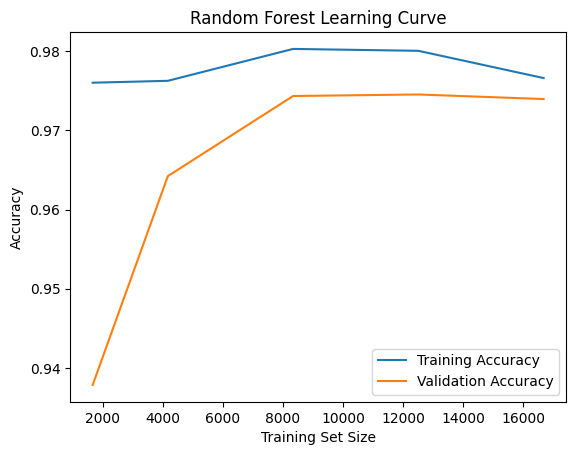

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_classifier, train_X, train_y, cv=5, scoring='accuracy',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve")
plt.legend()
plt.show()

In [ ]:
pred=random_forest_classifier.predict(test_X)
accuracy_score(pred, test_y)

0.9756378285056589

In [ ]:
print(random_forest_classifier.predict([test_X.iloc[5000]]), test_y.iloc[5000])

[66] 66


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
with open("random_forest_classifier.pkl", "wb") as f:
    pickle.dump(random_forest_classifier, f)

In [ ]:
def mean():
  model=[]
  for i in range(65, 91):
    cols=np.zeros(300)
    rows=train_X[train_y==i]
    for j in range(300):
      cols[j]=rows[str(j)].mean()
    model.append(cols)
  return np.array(model)

In [ ]:
def median():
  model=[]
  for i in range(65, 91):
    cols=np.zeros(300)
    rows=train_X[train_y==i]
    for j in range(300):
      cols[j]=rows[str(j)].median()
    model.append(cols)
  return np.array(model)

In [ ]:
def q_mean():
  model=[]
  for i in range(65, 91):
    cols=np.zeros(300)
    rows=train_X[train_y==i]
    for j in range(300):
      temp=np.quantile(rows[str(j)], [0.25, 0.75])
      cols[j]=(temp[0]+temp[1])/2
    model.append(cols)
  return np.array(model)

In [ ]:
def euqlidian_distance(x, y):
  return np.linalg.norm(x-y)

In [ ]:
def predict(X):
  total=[]
  m1=mean()
  m2=median()
  m3=q_mean()
  for j in range(X.shape[0]):
    d1=[]
    d2=[]
    d3=[]
    for i in range(26):
      d1.append(euqlidian_distance(X.iloc[j], m1[i]))
      d2.append(euqlidian_distance(X.iloc[j], m2[i]))
      d3.append(euqlidian_distance(X.iloc[j], m3[i]))
    min1=d1.index(min(d1))+65
    min2=d2.index(min(d2))+65
    min3=d3.index(min(d3))+65
    values, counts = np.unique(np.array([min1, min2, min3]), return_counts=True)
    mode = values[np.argmax(counts)]
    total.append(mode)
  return total

In [ ]:
pred=np.array(predict(test_X))
accuracy_score(test_y, pred)

0.7020909265298293

In [ ]:
total=0
temp=pred[pred==test_y]
print(temp.shape, pred.shape)
# for i in temp:
#   if i==1:total+=1
# print(total, temp.shape)

(3603,) (5213,)


In [ ]:
pred=np.array(predict(test_X))
accuracy_score(test_y, pred)

0.6846345674275849

In [ ]:
from sklearn.cluster import KMeans

model = []
for i in range(65, 91):
    rows = train_X[train_y == i]
    kmeans = KMeans(n_clusters=1, random_state=42).fit(rows)
    model.append(kmeans.cluster_centers_[0])
model = np.array(model)


In [ ]:
pred=np.array(predict(test_X))
accuracy_score(test_y, pred)

0.6911567235756761

In [ ]:
pred=np.array(predict(test_X))
accuracy_score(test_y, pred)

0.6840590830615768

In [41]:
from sklearn.cluster import KMeans
import numpy as np

def build_model(train_X, train_y, k=5):
    model = []
    labels = []
    for i in range(65, 91):
        rows = train_X[train_y == i]
        kmeans = KMeans(n_clusters=k, random_state=42).fit(rows)
        model.extend(kmeans.cluster_centers_)
        labels.extend([i] * k)
    return np.array(model), np.array(labels)

model, model_labels = build_model(train_X, train_y, k=8)


In [42]:
def predict(X, model, model_labels):
    total = []
    for j in range(X.shape[0]):
        distances = np.linalg.norm(model - X.iloc[j].values, axis=1)
        nearest = np.argmin(distances)
        total.append(model_labels[nearest])
    return total


In [43]:
pred = np.array(predict(test_X, model, model_labels))
print("Accuracy:", accuracy_score(test_y, pred))


Accuracy: 0.9909840782658738


In [23]:
from sklearn.metrics import accuracy_score

def train_and_evaluate_both(train_X_sub, train_y_sub, test_X, test_y, k=5):
    # Train custom model
    model, model_labels = build_model(train_X_sub, train_y_sub, k=k)

    # Predict on training subset
    train_pred = np.array(predict(train_X_sub, model, model_labels))
    train_acc = accuracy_score(train_y_sub, train_pred)

    # Predict on test set
    test_pred = np.array(predict(test_X, model, model_labels))
    test_acc = accuracy_score(test_y, test_pred)

    return train_acc, test_acc


In [44]:
import numpy as np
from sklearn.utils import shuffle

# Shuffle once for fairness
train_X_shuf, train_y_shuf = shuffle(train_X, train_y, random_state=42)

train_sizes = np.linspace(0.1, 1.0, 8)
train_sizes_abs = (train_sizes * len(train_X_shuf)).astype(int)

train_accuracies = []
test_accuracies = []

for size in train_sizes_abs:
    X_sub = train_X_shuf.iloc[:size]
    y_sub = train_y_shuf.iloc[:size]

    train_acc, test_acc = train_and_evaluate_both(
        X_sub, y_sub, test_X, test_y, k=8
    )

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Train size: {size}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")


Train size: 2085, Train Acc: 0.9947, Test Acc: 0.9868
Train size: 4765, Train Acc: 0.9920, Test Acc: 0.9896
Train size: 7446, Train Acc: 0.9902, Test Acc: 0.9883
Train size: 10127, Train Acc: 0.9948, Test Acc: 0.9919
Train size: 12807, Train Acc: 0.9945, Test Acc: 0.9923
Train size: 15488, Train Acc: 0.9942, Test Acc: 0.9910
Train size: 18169, Train Acc: 0.9947, Test Acc: 0.9933
Train size: 20850, Train Acc: 0.9945, Test Acc: 0.9931


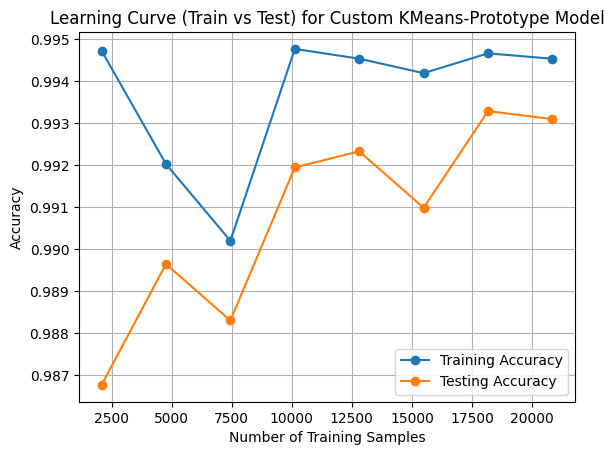

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_sizes_abs, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(train_sizes_abs, test_accuracies, marker='o', label='Testing Accuracy')

plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Train vs Test) for Custom KMeans-Prototype Model")
plt.legend()
plt.grid(True)
plt.show()
